<a href="https://colab.research.google.com/github/VictorGFL/CursodeExtensaopythonpandas/blob/main/IPCAnoPythonPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Série histórica do IPCA (Índice de preços no consumidor Amplo)
       Tratamento e manipulação de dados com o Python Pandas

AUTOR: Victor Gabriel Ferreira Leite

DATA: 09/02/2023

In [5]:
#Instalei a biblioteca Pandas
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Importei a biblioteca pandas no python e também a base de dados
import pandas as pd

In [7]:
#Defini o dataframe como o arquivo em excel
HistIPCA_df = pd.read_excel('STP-20230209182722814.xlsx')

#Para mostrar o Dataframe basta:
print(HistIPCA_df)

          Data  \
0   1980-01-01   
1   1980-02-01   
2   1980-03-01   
3   1980-04-01   
4   1980-05-01   
..         ...   
512 2022-09-01   
513 2022-10-01   
514 2022-11-01   
515 2022-12-01   
516 2023-01-01   

     433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  
0                                                 6.62                           
1                                                 4.62                           
2                                                 6.04                           
3                                                 5.29                           
4                                                 5.70                           
..                                                 ...                           
512                                              -0.29                           
513                                               0.59                           
514                                          

In [8]:
# Comando para mostrar a quantidade de linhas e colunas
display(HistIPCA_df.shape)

#Só a quantidade de colunas
print(HistIPCA_df.shape[1])

#Só a quantidade de linhas
print(HistIPCA_df.shape[0])

(517, 2)

2
517


In [9]:
#Para exibir somente as 3 primeiras linhas 
display(HistIPCA_df.head(3))

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal
0,1980-01-01,6.62
1,1980-02-01,4.62
2,1980-03-01,6.04


In [10]:
# Comando para retornar dados estatísticos do banco de dados
display(HistIPCA_df.describe())

,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal
count,517.000000
mean,5.927427
std,10.846192
min,-0.680000
25%,0.380000
50%,0.780000
75%,6.840000
max,82.390000


In [11]:
#Retorna uma descrição das colunas do data frame
print(HistIPCA_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Data                                                                        517 non-null    datetime64[ns]
 1   433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  517 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB
None


In [12]:
#Renomeando uma coluna para melhor manuseio dos dados
df = HistIPCA_df.rename(columns={'433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal': 'Var. % mensal'})

In [13]:
#Preenchimento com condicional
import numpy as np
df['Status comparado com a meta'] = np.where(df['Var. % mensal'] > 0.39, 'Acima', 'Dentro')

In [14]:
#Retorna uma descrição das colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         517 non-null    datetime64[ns]
 1   Var. % mensal                517 non-null    float64       
 2   Status comparado com a meta  517 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.2+ KB
None


In [15]:
#Descobrir o maior valor e o seu mes/ano
display(df[['Var. % mensal', 'Data']].max())
df.loc[(df['Var. % mensal'] == 82.39)]

Var. % mensal                  82.39
Data             2023-01-01 00:00:00
dtype: object

,Data,Var. % mensal,Status comparado com a meta
122,1990-03-01,82.39,Acima


In [16]:
#Descobrir o menor valor e o seu mes/ano
display(df['Var. % mensal'].min())
df.loc[(df['Var. % mensal'] == -0.68)]

-0.68

,Data,Var. % mensal,Status comparado com a meta
510,2022-07-01,-0.68,Dentro


In [17]:
#Agrupar e contar quantos anos foram acima ou dentro da meta estipulada
date_col = pd.DatetimeIndex(df['Data'])
df['Ano'] = date_col.year
ano_df = df.groupby(by=['Ano']).sum()
ano_df['Meta'] = np.where(ano_df['Var. % mensal'] > 4, 'Acima', 'Dentro')
IPCAdf = ano_df.groupby(by=['Meta']).count()
IPCAdf.reset_index(inplace=True)
meta_de_inflacao = IPCAdf.rename(columns={'Var. % mensal': 'Qtd. Anos'})
display(meta_de_inflacao)

,Meta,Qtd. Anos
0,Acima,39
1,Dentro,5


<ipython-input-44-203f7b4fdebb>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(vals, labels=labels, autopct="%.2f%%", shadow=True, explode=explode)


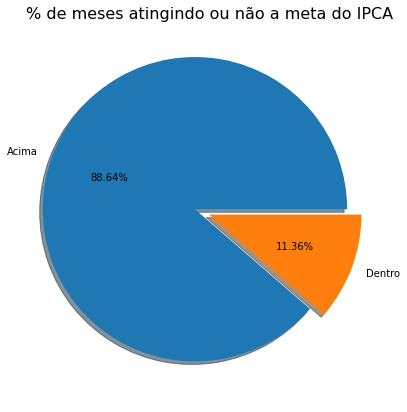

In [44]:
#Plotar gráfico de comparação da quantidade de meses acima e dentro da meta
from matplotlib import pyplot as plt
labels = ['Acima', 'Dentro']
vals = [meta_de_inflacao['Qtd. Anos']]
explode = (0.1, 0)
fig, ax = plt.subplots(figsize = (15,7))

ax.pie(vals, labels=labels, autopct="%.2f%%", shadow=True, explode=explode)
ax.set_title('% de meses atingindo ou não a meta do IPCA', fontsize=16)
plt.show()

In [31]:
#Exportar para xlsx o dataframe
meta_de_inflacao.to_excel('Comparacao_do_IPCA_com_a_meta_anual.xlsx', sheet_name = 'Distribuicao')